<a href="https://colab.research.google.com/github/KadaliSurendra/7-3-2020/blob/master/Classification_updated_pickling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/adult.csv')
data[:100]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20,Private,479296,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
96,25,Private,235218,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K
97,49,Private,164877,10th,6,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
98,59,Private,272087,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [5]:
data.isin(['?']).sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [6]:
data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)
data['native-country'] = data['native-country'].replace('?',np.nan)

In [7]:
data.isna().sum()


,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [8]:
data.dropna(inplace=True)

In [9]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [10]:
df_above50k=data[data.isin(['>50K']).any(axis=1)]
df_50k = data[data.isin(['<=50K']).any(axis=1)]

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
encoders = {}
mappings = {}

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

for column in categorical_columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])
    encoders[column] = encoder
    mappings[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for column, mapping in mappings.items():
    print(f"Mapping for '{column}':")
    for class_name, label in mapping.items():
        print(f'  {class_name}: {label}')
    print()

Mapping for 'workclass':
  Federal-gov: 0
  Local-gov: 1
  Private: 2
  Self-emp-inc: 3
  Self-emp-not-inc: 4
  State-gov: 5
  Without-pay: 6

Mapping for 'education':
  10th: 0
  11th: 1
  12th: 2
  1st-4th: 3
  5th-6th: 4
  7th-8th: 5
  9th: 6
  Assoc-acdm: 7
  Assoc-voc: 8
  Bachelors: 9
  Doctorate: 10
  HS-grad: 11
  Masters: 12
  Preschool: 13
  Prof-school: 14
  Some-college: 15

Mapping for 'marital-status':
  Divorced: 0
  Married-AF-spouse: 1
  Married-civ-spouse: 2
  Married-spouse-absent: 3
  Never-married: 4
  Separated: 5
  Widowed: 6

Mapping for 'occupation':
  Adm-clerical: 0
  Armed-Forces: 1
  Craft-repair: 2
  Exec-managerial: 3
  Farming-fishing: 4
  Handlers-cleaners: 5
  Machine-op-inspct: 6
  Other-service: 7
  Priv-house-serv: 8
  Prof-specialty: 9
  Protective-serv: 10
  Sales: 11
  Tech-support: 12
  Transport-moving: 13

Mapping for 'relationship':
  Husband: 0
  Not-in-family: 1
  Other-relative: 2
  Own-child: 3
  Unmarried: 4
  Wife: 5

Mapping for 'race'

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45222 non-null  int64
 1   workclass        45222 non-null  int64
 2   fnlwgt           45222 non-null  int64
 3   education        45222 non-null  int64
 4   educational-num  45222 non-null  int64
 5   marital-status   45222 non-null  int64
 6   occupation       45222 non-null  int64
 7   relationship     45222 non-null  int64
 8   race             45222 non-null  int64
 9   gender           45222 non-null  int64
 10  capital-gain     45222 non-null  int64
 11  capital-loss     45222 non-null  int64
 12  hours-per-week   45222 non-null  int64
 13  native-country   45222 non-null  int64
 14  income           45222 non-null  int64
dtypes: int64(15)
memory usage: 5.5 MB


In [13]:
class_distribution = data['income'].value_counts()
print("Class Distribution:",class_distribution)

Class Distribution: income
0    34014
1    11208
Name: count, dtype: int64


In [14]:
desired_class_count = 11000  # 22000 rows in total, balanced (11,000 per class)

# Separate the DataFrame by class
df_class_0 = data[data['income'] == 0]
df_class_1 = data[data['income'] == 1]

# Downsample each class
df_class_0_downsampled = df_class_0.sample(n=desired_class_count, random_state=42)
df_class_1_downsampled = df_class_1.sample(n=desired_class_count, random_state=42)

# Combine the downsampled classes into a single DataFrame
df_downsampled = pd.concat([df_class_0_downsampled, df_class_1_downsampled])

# Shuffle the DataFrame to ensure randomness
data = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

data['income'].value_counts()

,count
income,
1,11000
0,11000


In [15]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,28,2,176683,8,11,2,12,0,4,1,0,0,70,38,1
1,21,2,162228,15,10,4,0,3,4,1,0,0,40,38,0
2,30,2,143766,15,10,4,2,1,4,1,0,0,40,38,0
3,41,1,227644,15,10,2,2,0,4,1,0,0,40,38,0
4,55,2,119751,12,14,4,9,2,1,0,0,0,40,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,31,2,323055,11,9,2,13,0,4,1,0,0,50,38,1
21996,47,2,51835,14,15,2,9,5,4,0,0,1902,60,15,1
21997,22,2,198366,11,9,2,11,0,2,1,0,0,20,38,0
21998,49,2,268234,0,6,2,3,0,4,1,0,0,40,38,0


<Axes: >

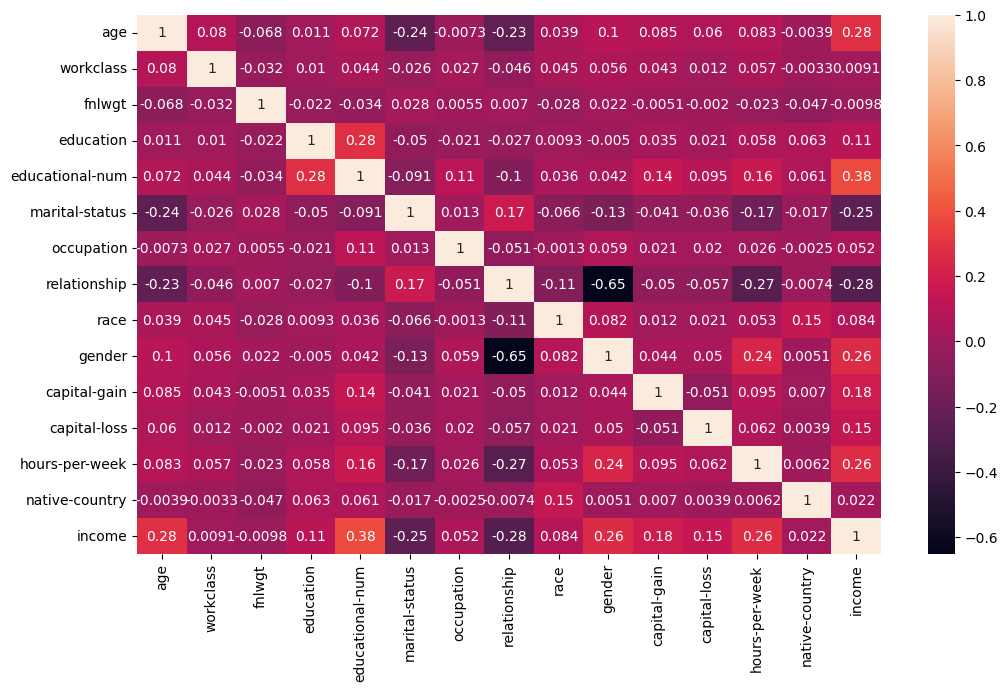

In [17]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True)

In [18]:
data.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.079885,-0.068048,0.011072,0.071602,-0.244860,-0.007294,-0.234149,0.038731,0.101527,0.085229,0.060002,0.083220,-0.003936,0.282834
workclass,0.079885,1.000000,-0.031954,0.010119,0.044427,-0.026332,0.027104,-0.046249,0.045139,0.055575,0.043359,0.011597,0.057032,-0.003264,0.009083
fnlwgt,-0.068048,-0.031954,1.000000,-0.021808,-0.033801,0.027842,0.005518,0.006960,-0.028199,0.022277,-0.005084,-0.002027,-0.023466,-0.047198,-0.009775
education,0.011072,0.010119,-0.021808,1.000000,0.282603,-0.050473,-0.021241,-0.027207,0.009311,-0.005029,0.035196,0.020554,0.058061,0.063146,0.108781
educational-num,0.071602,0.044427,-0.033801,0.282603,1.000000,-0.090695,0.112956,-0.103227,0.035615,0.042333,0.143038,0.094748,0.164095,0.061105,0.377364
marital-status,-0.244860,-0.026332,0.027842,-0.050473,-0.090695,1.000000,0.012546,0.173793,-0.065998,-0.132275,-0.041130,-0.035604,-0.174953,-0.017118,-0.246309
occupation,-0.007294,0.027104,0.005518,-0.021241,0.112956,0.012546,1.000000,-0.050872,-0.001302,0.058593,0.021446,0.019942,0.025505,-0.002467,0.051744
relationship,-0.234149,-0.046249,0.006960,-0.027207,-0.103227,0.173793,-0.050872,1.000000,-0.105236,-0.651674,-0.050028,-0.056895,-0.265392,-0.007411,-0.284964
race,0.038731,0.045139,-0.028199,0.009311,0.035615,-0.065998,-0.001302,-0.105236,1.000000,0.081568,0.011552,0.020728,0.052838,0.148734,0.083725
gender,0.101527,0.055575,0.022277,-0.005029,0.042333,-0.132275,0.058593,-0.651674,0.081568,1.000000,0.044350,0.049794,0.235645,0.005145,0.258730


In [49]:
x=data.drop(columns=['income','capital-loss'])
y=data['income']

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_test

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,hours-per-week,native-country
13035,64,2,237581,5,4,2,13,0,4,1,0,48,25
3115,30,2,159187,9,13,2,9,0,4,1,0,55,38
8732,48,4,49275,15,10,2,4,0,4,1,0,50,38
7591,30,2,345122,14,15,2,9,0,4,1,0,50,38
221,33,2,72338,14,15,2,3,0,1,1,0,65,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11029,64,4,192695,4,3,2,4,0,4,1,0,70,1
15815,31,2,132996,11,9,2,9,0,4,1,5178,45,38
1675,35,2,151322,15,10,4,2,1,4,1,0,40,38
21589,52,2,174767,15,10,2,3,0,4,1,0,45,38


In [51]:
scalar= StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)


#**LogisticRegression**

In [52]:
Logistic_model= LogisticRegression()
Logistic_model

LogisticRegression()

In [53]:
Logistic_model.fit(x_train,y_train)

LogisticRegression()

In [54]:
logis_y_pred= Logistic_model.predict(x_test)
print(pd.DataFrame({'Actual':y_test,'Predicted':logis_y_pred}))

       Actual  Predicted
13035       1          0
3115        1          1
8732        0          1
7591        0          1
221         1          1
...       ...        ...
11029       0          0
15815       1          1
1675        0          0
21589       1          1
15012       1          1

[6600 rows x 2 columns]


In [55]:
print('Accuracy :',accuracy_score(y_test,logis_y_pred))
print('Logistic_confusion_matrix:',confusion_matrix(y_test,logis_y_pred))
print('Classification Report:')
print(classification_report(y_test, logis_y_pred))

Accuracy : 0.7633333333333333
Logistic_confusion_matrix: [[2508  798]
 [ 764 2530]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      3306
           1       0.76      0.77      0.76      3294

    accuracy                           0.76      6600
   macro avg       0.76      0.76      0.76      6600
weighted avg       0.76      0.76      0.76      6600



# **KNN**

In [ ]:
# Hyperparameter tuning for k
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(best_k)

18


In [26]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=18, weights='distance') # distance determine the "closeness" of data points (Euclidean distance).
knn.fit(x_train, y_train)

# Make predictions
KNN_y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, KNN_y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('KNN_confusion_matrix:',confusion_matrix(y_test,KNN_y_pred))
print('Classification Report:')
print(classification_report(y_test, KNN_y_pred))

Accuracy: 0.79
KNN_confusion_matrix: [[2526  780]
 [ 578 2716]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79      3306
           1       0.78      0.82      0.80      3294

    accuracy                           0.79      6600
   macro avg       0.80      0.79      0.79      6600
weighted avg       0.80      0.79      0.79      6600



# **Random_Forest**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest
rf = RandomForestClassifier()

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

KeyboardInterrupt: 

In [27]:
Rand_forest = RandomForestClassifier(random_state=42,max_depth=20, max_features='sqrt', min_samples_leaf= 5, min_samples_split= 5, n_estimators= 200)
Rand_forest.fit(x_train,y_train)
Rand_Y_predict = Rand_forest.predict(x_test)
print(pd.DataFrame({'Actual':y_test,'predicted':Rand_Y_predict}))

       Actual  predicted
13035       1          0
3115        1          1
8732        0          0
7591        0          1
221         1          1
...       ...        ...
11029       0          0
15815       1          1
1675        0          0
21589       1          1
15012       1          0

[6600 rows x 2 columns]


In [28]:
print('Accuracy :',accuracy_score(y_test,Rand_Y_predict))
print('Random_Forest_confusion_matrix:',confusion_matrix(y_test,Rand_Y_predict))
print(classification_report(y_test,Rand_Y_predict))

Accuracy : 0.8234848484848485
Random_Forest_confusion_matrix: [[2611  695]
 [ 470 2824]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      3306
           1       0.80      0.86      0.83      3294

    accuracy                           0.82      6600
   macro avg       0.82      0.82      0.82      6600
weighted avg       0.83      0.82      0.82      6600



In [29]:
#feature importance
importances = Rand_forest.feature_importances_
feature_names = x.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

            Feature  Importance
7      relationship    0.224484
5    marital-status    0.160571
0               age    0.127174
4   educational-num    0.125137
10     capital-gain    0.104144
11   hours-per-week    0.061880
2            fnlwgt    0.058938
6        occupation    0.048942
3         education    0.040397
9            gender    0.017720
1         workclass    0.017583
12   native-country    0.007202
8              race    0.005827


# **Decision_Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize Decision Tree
dt = DecisionTreeClassifier()

# Initialize Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Score: 0.8051298701298701


In [58]:


# Initialize Decision Tree with tuned parameters
D_tree_model = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=10)
D_tree_model.fit(x_train, y_train)

# Predictions and evaluation
Decision_y_pred = D_tree_model.predict(x_test)
print(classification_report(y_test, Decision_y_pred))
print(accuracy_score(y_test,Decision_y_pred))


              precision    recall  f1-score   support

           0       0.84      0.79      0.81      3306
           1       0.80      0.85      0.82      3294

    accuracy                           0.82      6600
   macro avg       0.82      0.82      0.82      6600
weighted avg       0.82      0.82      0.82      6600

0.8190909090909091


# **comparision of models**

In [32]:
# Initializing the model
Rand_forest_model =  RandomForestClassifier(random_state=42,max_depth=20, max_features='sqrt', min_samples_leaf= 5, min_samples_split= 5, n_estimators= 200)
Decision_tree_model = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=10)
KNN_model = KNeighborsClassifier(n_neighbors=18, weights='distance')
Logistic_model = LogisticRegression()

#cross-validation
Rand_score = cross_val_score(Rand_forest_model, x, y, cv=5)  # cv specifies the number of folds
Decision_score = cross_val_score(Decision_tree_model, x, y, cv=5)
KNN_score = cross_val_score(KNN_model, x, y, cv=5)
Logistic_score= cross_val_score(Logistic_model, x, y, cv=5)

print("Cross-Validation Scores:")
print("Mean Accuracy of Random_Forest:", Rand_score.mean())
print("Mean Accuracy of Decision_Tree:", Decision_score.mean())
print("Mean Accuracy of KNN:", KNN_score.mean())
print("Mean Accuracy of Logistic_Regression:", Logistic_score.mean())

Cross-Validation Scores:
Mean Accuracy of Random_Forest: 0.8242727272727273
Mean Accuracy of Decision_Tree: 0.8070909090909091
Mean Accuracy of KNN: 0.6008181818181818
Mean Accuracy of Logistic_Regression: 0.6213636363636363


* **Mapping for 'workclass'**:
  1. Federal-gov: 0
  2. Local-gov: 1
  3. Private: 2
  4. Self-emp-inc: 3
  5. Self-emp-not-inc: 4
  6. State-gov: 5
  7. Without-pay: 6


* Mapping for **'education'**:
  1. 10th: 0
  2. 11th: 1
  3. 12th: 2
  4. 1st-4th: 3
  5. 5th-6th: 4
  6. 7th-8th: 5
  7. 9th: 6
  8. Assoc-acdm: 7
  9. Assoc-voc: 8
  10. Bachelors: 9
  11. Doctorate: 10
  12. HS-grad: 11
  13. Masters: 12
  14. Preschool: 13
  15. Prof-school: 14
  16. Some-college: 15





**Mapping for 'marital-status'**:
  Divorced: 0
  Married-AF-spouse: 1
  Married-civ-spouse: 2
  Married-spouse-absent: 3
  Never-married: 4
  Separated: 5
  Widowed: 6

**Mapping for 'occupation'**:
  Adm-clerical: 0
  Armed-Forces: 1
  Craft-repair: 2
  Exec-managerial: 3
  Farming-fishing: 4
  Handlers-cleaners: 5
  Machine-op-inspct: 6
  Other-service: 7
  Priv-house-serv: 8
  Prof-specialty: 9
  Protective-serv: 10
  Sales: 11
  Tech-support: 12
  Transport-moving: 13

**Mapping for 'relationship':**
  Husband: 0
  Not-in-family: 1
  Other-relative: 2
  Own-child: 3
  Unmarried: 4
  Wife: 5

**Mapping for 'race':**
  Amer-Indian-Eskimo: 0
  Asian-Pac-Islander: 1
  Black: 2
  Other: 3
  White: 4

**Mapping for 'gender':**
  Female: 0
  Male: 1

**Mapping for 'native-country':**
  Cambodia: 0
  Canada: 1
  China: 2
  Columbia: 3
  Cuba: 4
  Dominican-Republic: 5
  Ecuador: 6
  El-Salvador: 7
  England: 8
  France: 9
  Germany: 10
  Greece: 11
  Guatemala: 12
  Haiti: 13
  Holand-Netherlands: 14
  Honduras: 15
  Hong: 16
  Hungary: 17
  India: 18
  Iran: 19
  Ireland: 20
  Italy: 21
  Jamaica: 22
  Japan: 23
  Laos: 24
  Mexico: 25
  Nicaragua: 26
  Outlying-US(Guam-USVI-etc): 27
  Peru: 28
  Philippines: 29
  Poland: 30
  Portugal: 31
  Puerto-Rico: 32
  Scotland: 33
  South: 34
  Taiwan: 35
  Thailand: 36
  Trinadad&Tobago: 37
  United-States: 38
  Vietnam: 39
  Yugoslavia: 40

**Mapping for 'income':**
  <=50K: 0
  >50K: 1


In [ ]:
df_above50k.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K


In [ ]:
df_50k.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [36]:
relationship_counts = df_above50k['relationship'].value_counts()
relationship_counts1 = df_50k['relationship'].value_counts()
mariage_counts = df_above50k['marital-status'].value_counts()
mariage_counts1 = df_50k['marital-status'].value_counts()
age_counts = df_above50k['age'].value_counts()
age_counts1 = df_50k['age'].value_counts()
education_counts = df_above50k['education'].value_counts()
education_counts1 = df_50k['education'].value_counts()
cap_gain_counts = df_above50k['capital-gain'].value_counts()
cap_gain_counts1 = df_50k['capital-gain'].value_counts()
hours_per_week_counts = df_above50k['hours-per-week'].value_counts()
hours_per_week_counts1 = df_50k['hours-per-week'].value_counts()

print(relationship_counts)
print()
print(relationship_counts1)
print()
print(mariage_counts)
print()
print(mariage_counts1)
print()
print(age_counts)
print()
print(age_counts1)
print()
print(education_counts)
print()
print(education_counts1)
print()
print(cap_gain_counts)
print()
print(cap_gain_counts1)
print()
print(hours_per_week_counts)
print()
print(hours_per_week_counts1)

relationship
Husband           8507
Not-in-family     1228
Wife              1016
Unmarried          302
Own-child          105
Other-relative      50
Name: count, dtype: int64

relationship
Not-in-family     10474
Husband           10159
Own-child          6521
Unmarried          4486
Other-relative     1299
Wife               1075
Name: count, dtype: int64

marital-status
Married-civ-spouse       9564
Never-married             701
Divorced                  655
Widowed                   121
Separated                  99
Married-spouse-absent      54
Married-AF-spouse          14
Name: count, dtype: int64

marital-status
Never-married            13897
Married-civ-spouse       11491
Divorced                  5642
Separated                 1312
Widowed                   1156
Married-spouse-absent      498
Married-AF-spouse           18
Name: count, dtype: int64

age
46    429
47    418
39    414
41    413
37    411
     ... 
83      2
20      1
88      1
85      1
84      1
Name: count, 

In [37]:
import pickle
pickle.dump(Rand_forest,open('Random_forest.pkl','wb'))


In [38]:
m= pickle.load(open('Random_forest.pkl','rb'))

In [39]:
x_test1=pd.DataFrame([[34,2,209536,9,12,2,10,0,3,1,0,50,38],
        [29,1,181593,10,13,4,9,0,4,0,0,40,38],
        [27,3,159547,11,12,4,12,1,2,1,5000,0,40],
        [46,2,139408,9,12,2,5,0,2,1,0,40,38]],columns=['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'hours-per-week', 'native-country'])

# x_test1=[[34,2,209536,9,12,2,10,0,3,1,0,50,38],
#         [29,1,181593,10,13,2,9,0,4,0,0,40,38],
#         [27,3,159547,11,12,2,12,1,2,5000,0,40]]


In [40]:
# x_test1=scalar.transform(x_test1)
print(x_test1)

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   34          2  209536          9               12               2   
1   29          1  181593         10               13               4   
2   27          3  159547         11               12               4   
3   46          2  139408          9               12               2   

   occupation  relationship  race  gender  capital-gain  hours-per-week  \
0          10             0     3       1             0              50   
1           9             0     4       0             0              40   
2          12             1     2       1          5000               0   
3           5             0     2       1             0              40   

   native-country  
0              38  
1              38  
2              40  
3              38  


In [41]:
x_test1=scalar.transform(x_test1)
y_test=[1,0,0,1]

In [42]:
m.predict(x_test1)

array([1, 0, 0, 1])

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}
grid_search = GridSearchCV(AdaBoostClassifier(base_estimator=D_tree_model),
                           param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(x_train, y_train)
best_adaboost = grid_search.best_estimator_


In [62]:
best_adaboost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_leaf=10),
                   learning_rate=0.01, n_estimators=150)

In [89]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150,learning_rate=0.01, random_state=42)
adaboost.fit(x_train, y_train)
y_pred = adaboost.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.76      0.75      0.75      3306
           1       0.75      0.76      0.76      3294

    accuracy                           0.75      6600
   macro avg       0.75      0.75      0.75      6600
weighted avg       0.75      0.75      0.75      6600

0.7546969696969696


In [87]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Perform grid search
grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_
best_xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [88]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=300,
    learning_rate=0.01,
    max_depth=3,

)
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred = xgb_model.predict(x_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [90]:
#cross
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=300,
    learning_rate=0.01,
    max_depth=3
)
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150,learning_rate=0.01, random_state=42)

ada_score = cross_val_score(adaboost,x,y,cv=5)
print('Adaboost_classifier:',ada_score.mean())
xg_cross_score = cross_val_score(xgb_model,x,y,cv=5)
print('Xgboost score:',xg_cross_score.mean())

Adaboost_classifier: 0.7574090909090909
Xgboost score: 0.817590909090909
